In [51]:
from pathlib import Path
from harmonizer.config import *
from harmonizer.diagnostics import get_series, get_yr_from_path
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler


DMSP_RAW = Path(DATA, "FranceDMSPraw")
DMSP_OUT = Path(ROOT, "output", "franceXGB")
FIGS_OUT = Path("/Users/daynan/nlt/dmsp-viirs-intercalibration/paper/figures")

In [50]:
pwd

'/Users/daynan/nlt/NTL_Harmonizer/notebooks'

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 90.83it/s]
0it [00:00, ?it/s]
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 80.45it/s]


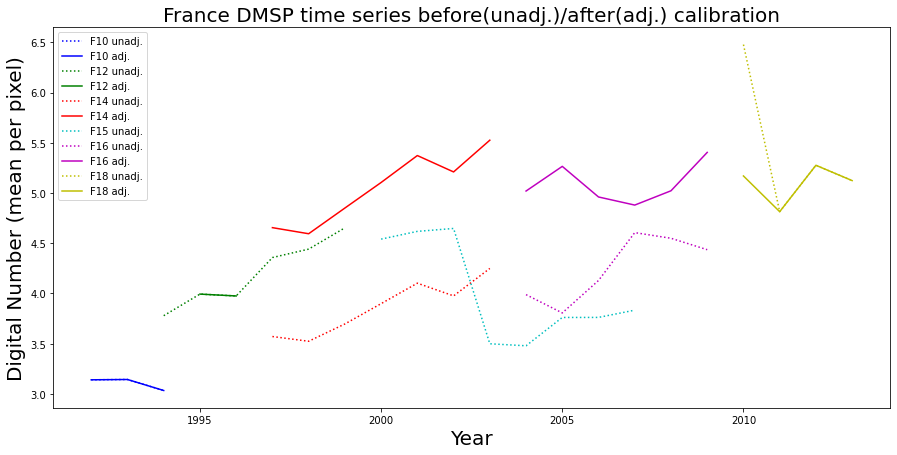

In [52]:
fig, ax = plt.subplots(1, figsize=(15,7))
for sat, clr in zip(["F10","F12","F14","F15","F16","F18"],'bgrcmy'):
    dmsp = sorted(list(DMSP_RAW.glob(f"*{sat}*.tif")))
    dmspyrs = [get_yr_from_path(i) for i in dmsp]
    dmsp_cal = [f for f in DMSP_OUT.glob("*.tif") for d in dmsp if d.name in str(f)]
    dmspcalyrs = [get_yr_from_path(i) for i in dmsp_cal]
    dmsp = get_series(dmsp, np.nanmean, thresh=0)
    dmsp_cal = get_series(dmsp_cal, np.nanmean, thresh=0)
    sns.lineplot(x=dmspyrs, y=dmsp, color=clr, ls=":", label=f"{sat} unadj.", ax=ax)
    sns.lineplot(x=dmspcalyrs, y=dmsp_cal, color=clr, label=f"{sat} adj.", ax=ax)
plt.legend()
plt.xlabel("Year",fontsize=20)
plt.ylabel("Digital Number (mean per pixel)", fontsize=20)
plt.title("France DMSP time series before(unadj.)/after(adj.) calibration", fontsize=20);
plt.savefig(Path(FIGS_OUT,"DMSPcalib.png"))
#     dmspraw = get_series(dmsp, np.nanmean, thresh=1)
#     dmspcal = get_series(dmsp_cal, np.nanmean, thresh=1)

In [13]:
dmsp_cal

[PosixPath('/Users/daynan/nlt/NTL_Harmonizer/output/franceXGB/F182010.v4d_web.stable_lights.avg_vis.tif'),
 PosixPath('/Users/daynan/nlt/NTL_Harmonizer/output/franceXGB/F182012.v4c_web.stable_lights.avg_vis.tif'),
 PosixPath('/Users/daynan/nlt/NTL_Harmonizer/output/franceXGB/F182011.v4c_web.stable_lights.avg_vis.tif'),
 PosixPath('/Users/daynan/nlt/NTL_Harmonizer/output/franceXGB/F182013.v4c_web.stable_lights.avg_vis.tif')]

In [ ]:
dmspraw = 


def dmsp_calibrate_plot(dmsp_raw, dmsp_reducefunc, thresh):
    dmsp = filepathsearch(outputdir, "F", "*.tif", firstonly=False)
    dmspyrs = [get_yr_from_path(i) for i in dmsp]
    dmsp_avg = get_series(dmsp, reducefunc, thresh=thresh)
    viirs_avg = get_series(viirs, reducefunc, thresh=thresh)
    plot_timeseries(
        seqs=[dmsp_avg, viirs_avg],
        yrs=[dmspyrs, viirsyrs],
        labels=["DMSP-OLS", "VIIRS-OLS (harmonized)"],
        opath=Path(resultsdir, "harmonized_ts_mean.png"),
        xlabel="Year",
        ylabel="mean radiance per pixel (DN)",
        title="Harmonized time series 1992-present for ROI (mean)",
    )